
NETFLIX DATA CLEANING, ANALYSIS AND VISUALIZATION


PHASE 1: DATA LOADING AND EXPLORATION
--------------------------------------------------------------------------------

Dataset Shape: (8790, 10)

Column Names:
['show_id', 'type', 'title', 'director', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in']

First 5 Rows:
  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021  

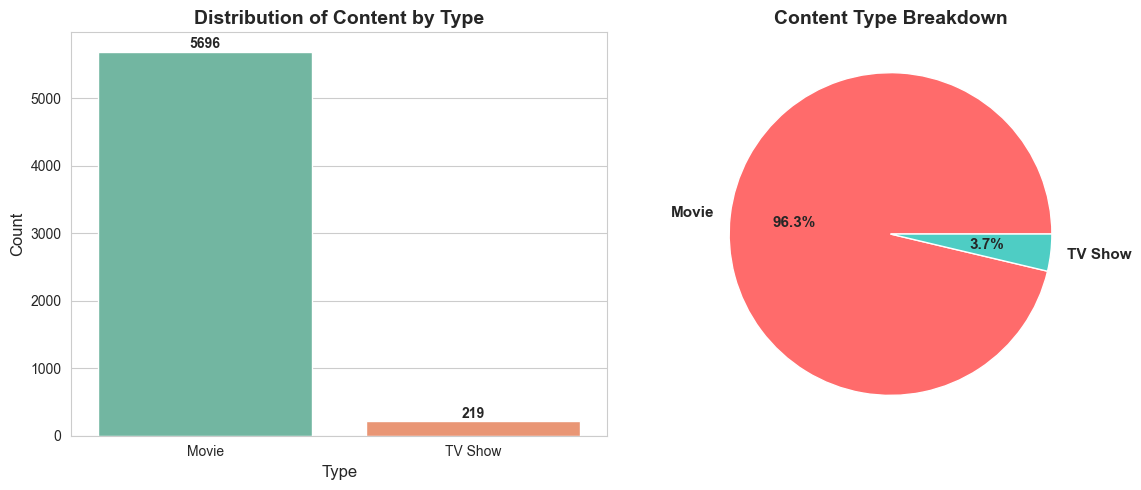


Chart saved as '01_content_type_distribution.png'

--------------------------------------------------------------------------------
ANALYSIS 2: RATING DISTRIBUTION
--------------------------------------------------------------------------------

Rating Distribution:
rating
TV-MA       2029
TV-14       1368
R            787
TV-PG        521
PG-13        486
PG           281
TV-G         112
TV-Y7        108
TV-Y          99
NR            75
G             41
TV-Y7-FV       3
UR             3
NC-17          2
Name: count, dtype: int64


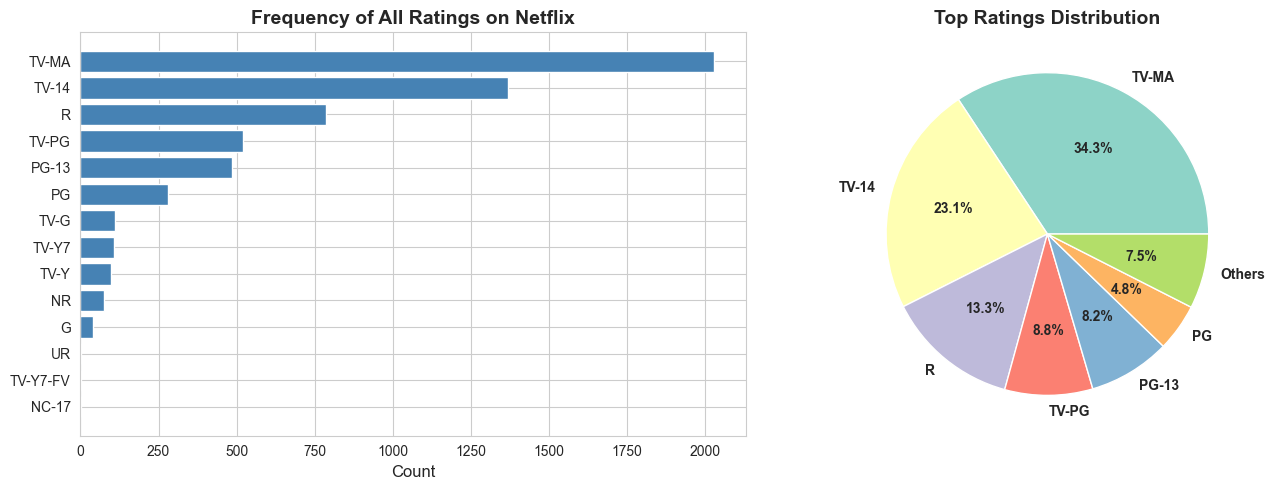


Chart saved as '02_rating_distribution.png'

--------------------------------------------------------------------------------
ANALYSIS 3: TOP 10 COUNTRIES
--------------------------------------------------------------------------------

Top 10 Countries with Most Content:
country
United States     2401
India              975
United Kingdom     406
Canada             189
France             156
Spain              140
Egypt              107
Nigeria            100
Japan               96
Mexico              93
Name: count, dtype: int64


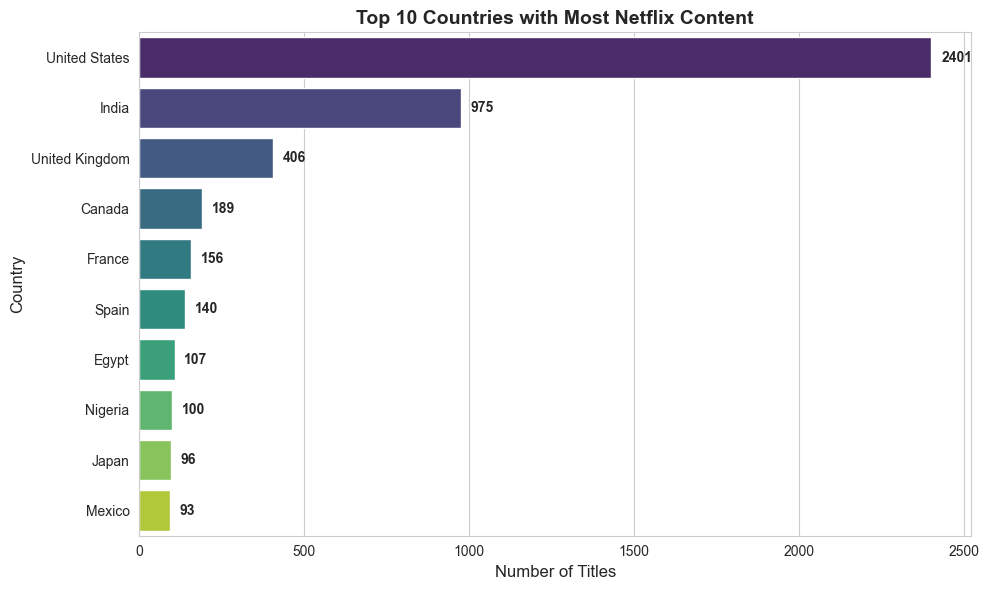


Chart saved as '03_top_10_countries.png'

--------------------------------------------------------------------------------
ANALYSIS 4: YEARLY CONTENT TRENDS
--------------------------------------------------------------------------------

Content Added by Year:
type        Movie  TV Show
year_added                
2008            1        0
2009            2        0
2010            1        0
2011           13        0
2012            3        0
2013            6        1
2014           18        0
2015           53        6
2016          232       11
2017          803       30
2018         1167       25
2019         1346       39
2020         1220       57
2021          831       50


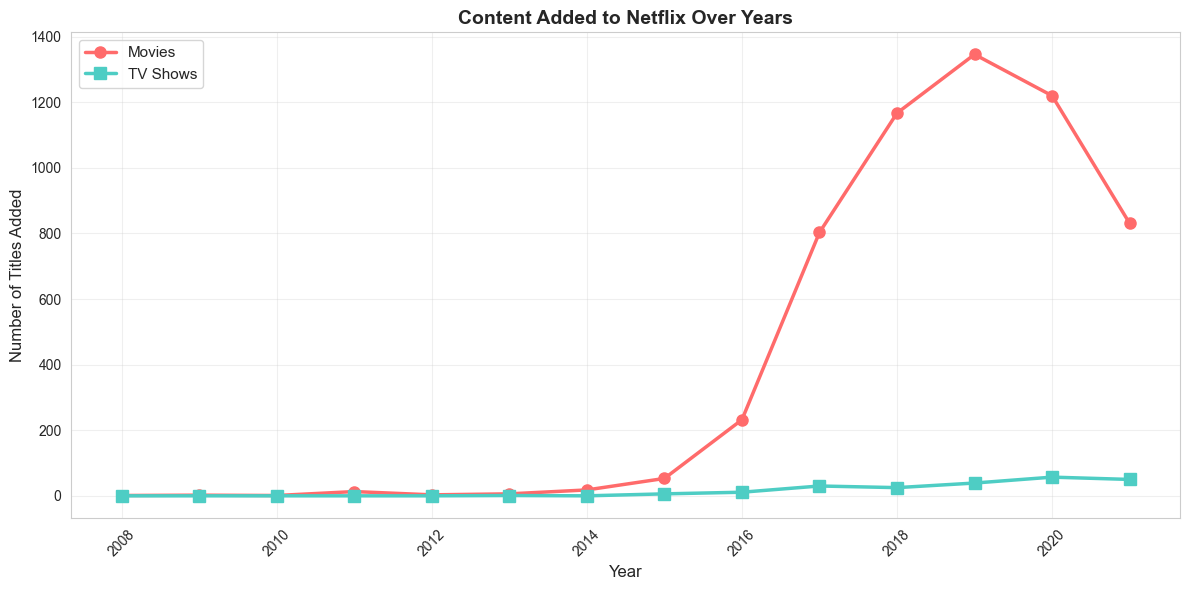


Chart saved as '04_yearly_content_trend.png'

--------------------------------------------------------------------------------
ANALYSIS 5: MONTHLY CONTENT TRENDS
--------------------------------------------------------------------------------

Content Added by Month:
type         Movie  TV Show
month_added                
1              513       15
2              360       20
3              499       21
4              514       21
5              403       19
6              446       20
7              512       19
8              473       19
9              468       17
10             518       14
11             480       10
12             510       24


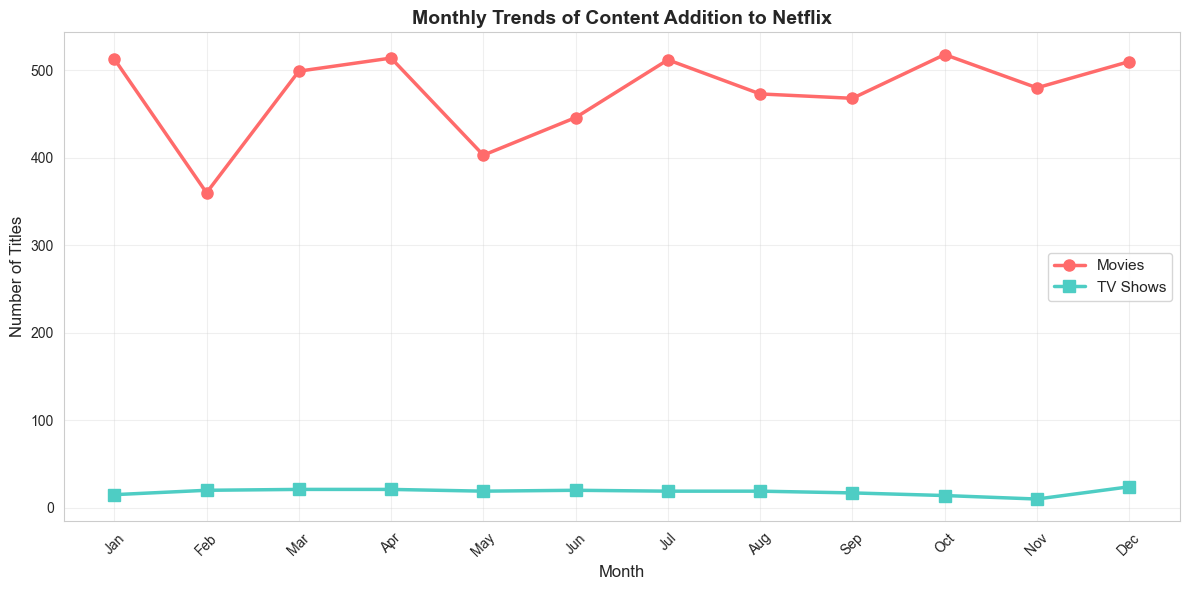


Chart saved as '05_monthly_content_trend.png'

--------------------------------------------------------------------------------
ANALYSIS 6: TOP 10 DIRECTORS
--------------------------------------------------------------------------------

Top 10 Directors with Most Titles:
director
Rajiv Chilaka             20
Alastair Fothergill       18
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Name: count, dtype: int64


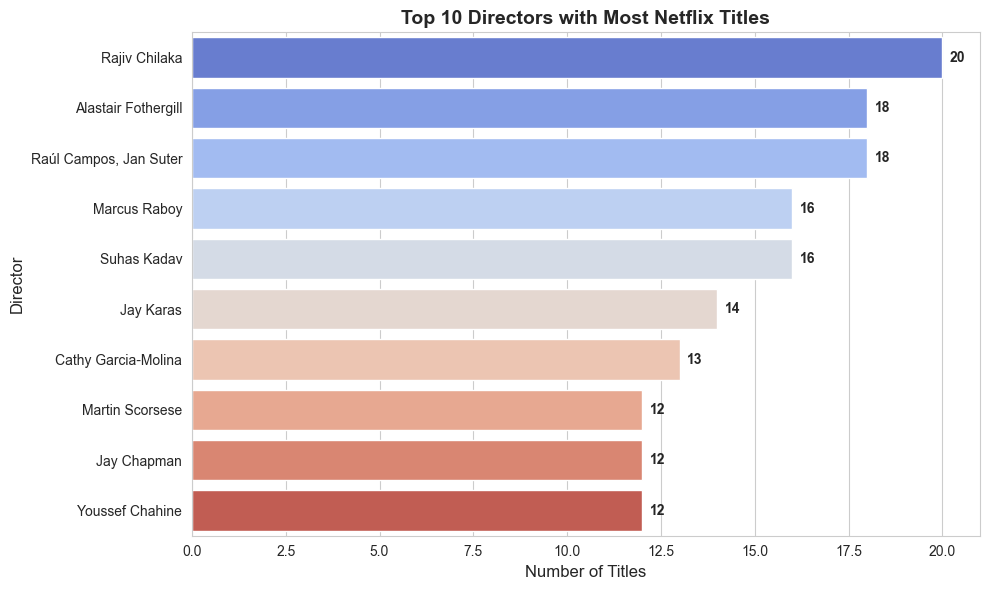


Chart saved as '06_top_10_directors.png'

--------------------------------------------------------------------------------
ANALYSIS 7: TOP 10 GENRES
--------------------------------------------------------------------------------

Top 10 Most Common Genres:
International Movies        2558
Dramas                      2330
Comedies                    1593
Action & Adventure           815
Documentaries                762
Independent Movies           742
Romantic Movies              588
Children & Family Movies     559
Thrillers                    558
Horror Movies                344
Name: count, dtype: int64


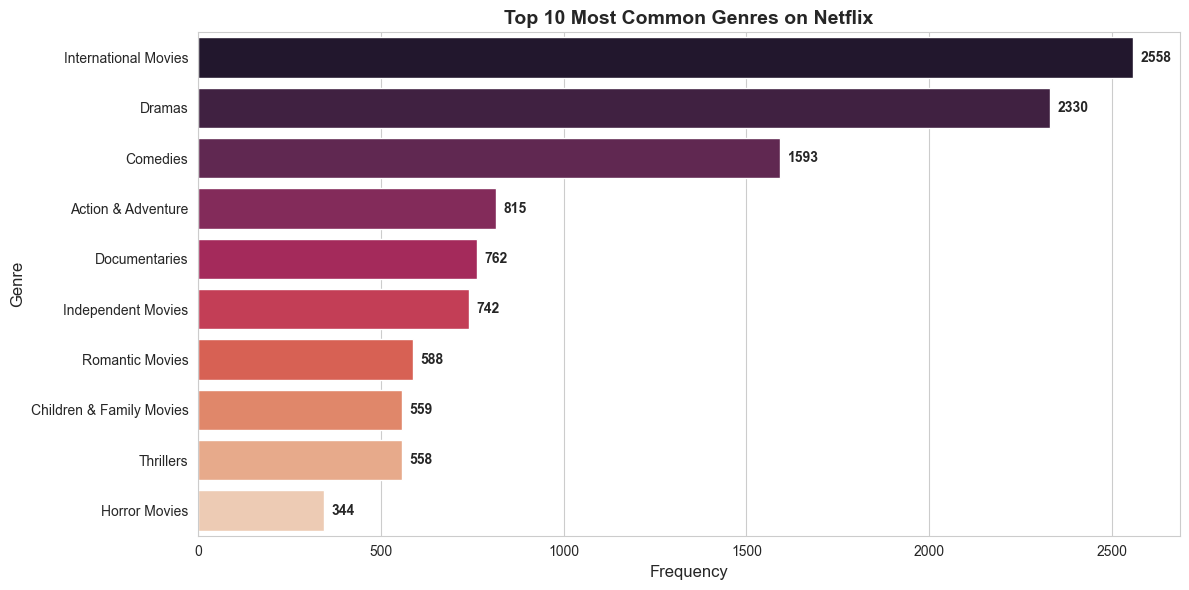


Chart saved as '07_top_10_genres.png'

--------------------------------------------------------------------------------
ANALYSIS 8: WORD CLOUD OF MOVIE TITLES
--------------------------------------------------------------------------------


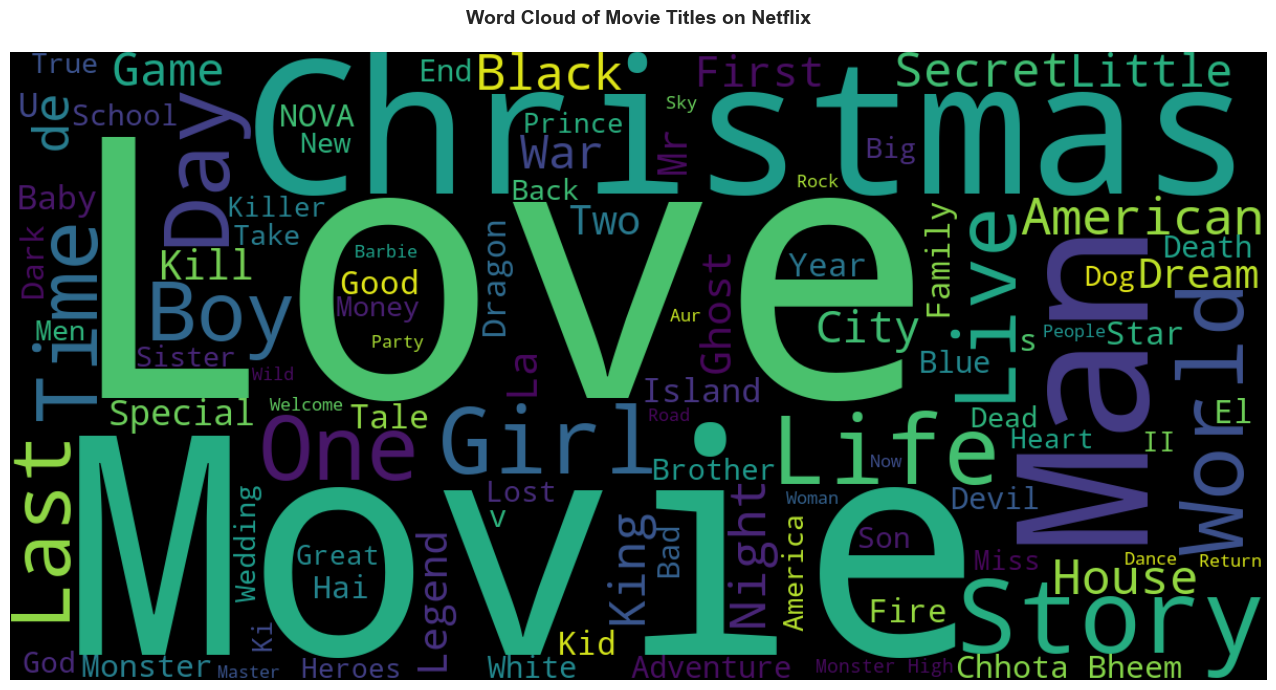


Chart saved as '08_wordcloud_movie_titles.png'

PHASE 4: ADDITIONAL INSIGHTS

Average Duration by Type:
type
Movie      100.797226
TV Show      1.680365
Name: duration_int, dtype: float64

Most Common Rating by Type:

Movies:
rating
TV-MA    1916
TV-14    1317
R         786
Name: count, dtype: int64

TV Shows:
rating
TV-MA    113
TV-14     51
TV-PG     27
Name: count, dtype: int64

Release Year Statistics:
count    5915.000000
mean     2013.014708
std         9.693770
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

Yearly Content Growth:
year_added
2008       1
2009       2
2010       1
2011      13
2012       3
2013       7
2014      18
2015      59
2016     243
2017     833
2018    1192
2019    1385
2020    1277
2021     881
dtype: int64

Genre Statistics:
Total unique genres: 42

Total unique directors: 4286

Total countries represented: 78

PHASE 5: SUMMARY REPORT GENERATION

NETFLIX DATA 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configure plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("\n" + "="*80)
print("NETFLIX DATA CLEANING, ANALYSIS AND VISUALIZATION")
print("="*80 + "\n")

# ============================================================================
# PHASE 1: LOAD AND EXPLORE DATA
# ============================================================================

print("\nPHASE 1: DATA LOADING AND EXPLORATION")
print("-" * 80)

df = pd.read_csv('netflix1.csv')

print("\nDataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

print("\nFirst 5 Rows:")
print(df.head())

print("\nColumn Information:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nDuplicate Rows:", df.duplicated().sum())

# ============================================================================
# PHASE 2: DATA CLEANING
# ============================================================================

print("\n" + "="*80)
print("PHASE 2: DATA CLEANING")
print("-" * 80)

df_clean = df.copy()

# Step 1: Remove Duplicates
df_clean = df_clean.drop_duplicates()
print("\nStep 1: Duplicates removed")
print("Current shape:", df_clean.shape)

# Step 2: Handle "Not Given" values
df_clean.replace('Not Given', np.nan, inplace=True)
print("\nStep 2: 'Not Given' values treated as NaN")

# Step 3: Drop rows with critical missing values
df_clean = df_clean.dropna(subset=['director', 'country'])
print("\nStep 3: Rows with missing director/country removed")
print("Current shape:", df_clean.shape)

# Step 4: Convert date_added to datetime
df_clean['date_added'] = pd.to_datetime(df_clean['date_added'], errors='coerce')
print("\nStep 4: date_added converted to datetime format")

# Step 5: Extract year, month, day from date_added
df_clean['year_added'] = df_clean['date_added'].dt.year
df_clean['month_added'] = df_clean['date_added'].dt.month
df_clean['day_added'] = df_clean['date_added'].dt.day
print("\nStep 5: Extracted year, month, day from date_added")

# Step 6: Extract numeric duration values
df_clean['duration_int'] = df_clean['duration'].str.extract('(\d+)').astype(int)
print("\nStep 6: Extracted numeric duration values")

# Step 7: Drop unnecessary columns
df_clean = df_clean.drop('show_id', axis=1)
print("\nStep 7: Dropped show_id column")

# Step 8: Verify cleaning
print("\n" + "="*80)
print("CLEANING SUMMARY")
print("="*80)
print(f"\nFinal shape: {df_clean.shape}")
print(f"\nMissing values after cleaning:")
print(df_clean.isnull().sum())
print(f"\nData types:")
print(df_clean.dtypes)

# Save cleaned data
df_clean.to_csv('cleaned_netflix_data.csv', index=False)
print("\nCleaned data saved as 'cleaned_netflix_data.csv'")

# ============================================================================
# PHASE 3: EXPLORATORY DATA ANALYSIS AND VISUALIZATION
# ============================================================================

print("\n" + "="*80)
print("PHASE 3: EXPLORATORY DATA ANALYSIS")
print("="*80)

# ANALYSIS 1: Content Type Distribution
print("\n" + "-" * 80)
print("ANALYSIS 1: CONTENT TYPE DISTRIBUTION")
print("-" * 80)

type_counts = df_clean['type'].value_counts()
print("\nContent Type Distribution:")
print(type_counts)

percentage = type_counts / len(df_clean) * 100
print("\nPercentage Distribution:")
print(percentage)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2', ax=axes[0])
axes[0].set_title('Distribution of Content by Type', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xlabel('Type', fontsize=12)

for i, v in enumerate(type_counts.values):
    axes[0].text(i, v + 50, str(v), ha='center', fontweight='bold')

colors = ['#FF6B6B', '#4ECDC4']
axes[1].pie(type_counts.values, labels=type_counts.index, autopct='%1.1f%%', 
            colors=colors, textprops={'fontsize': 11, 'weight': 'bold'})
axes[1].set_title('Content Type Breakdown', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('01_content_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '01_content_type_distribution.png'")

# ANALYSIS 2: Rating Distribution
print("\n" + "-" * 80)
print("ANALYSIS 2: RATING DISTRIBUTION")
print("-" * 80)

rating_counts = df_clean['rating'].value_counts()
print("\nRating Distribution:")
print(rating_counts)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

rating_counts_sorted = rating_counts.sort_values()
axes[0].barh(rating_counts_sorted.index, rating_counts_sorted.values, color='steelblue')
axes[0].set_title('Frequency of All Ratings on Netflix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Count', fontsize=12)

top_ratings = rating_counts.head(6)
other_count = rating_counts[6:].sum()
labels = list(top_ratings.index) + ['Others']
values = list(top_ratings.values) + [other_count]

colors_pie = plt.cm.Set3(range(len(labels)))
axes[1].pie(values, labels=labels, autopct='%1.1f%%', colors=colors_pie, 
            textprops={'fontsize': 10, 'weight': 'bold'})
axes[1].set_title('Top Ratings Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('02_rating_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '02_rating_distribution.png'")

# ANALYSIS 3: Top 10 Countries
print("\n" + "-" * 80)
print("ANALYSIS 3: TOP 10 COUNTRIES")
print("-" * 80)

country_counts = df_clean['country'].value_counts().head(10)
print("\nTop 10 Countries with Most Content:")
print(country_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title('Top 10 Countries with Most Netflix Content', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)

for i, v in enumerate(country_counts.values):
    plt.text(v + 30, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('03_top_10_countries.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '03_top_10_countries.png'")

# ANALYSIS 4: Yearly Content Trends
print("\n" + "-" * 80)
print("ANALYSIS 4: YEARLY CONTENT TRENDS")
print("-" * 80)

yearly_data = df_clean.groupby(['year_added', 'type']).size().unstack(fill_value=0)
print("\nContent Added by Year:")
print(yearly_data)

plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data['Movie'], marker='o', linewidth=2.5, 
         label='Movies', markersize=8, color='#FF6B6B')
plt.plot(yearly_data.index, yearly_data['TV Show'], marker='s', linewidth=2.5, 
         label='TV Shows', markersize=8, color='#4ECDC4')

plt.title('Content Added to Netflix Over Years', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(fontsize=11, loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('04_yearly_content_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '04_yearly_content_trend.png'")

# ANALYSIS 5: Monthly Content Trends
print("\n" + "-" * 80)
print("ANALYSIS 5: MONTHLY CONTENT TRENDS")
print("-" * 80)

monthly_data = df_clean.groupby(['month_added', 'type']).size().unstack(fill_value=0)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print("\nContent Added by Month:")
print(monthly_data)

plt.figure(figsize=(12, 6))
plt.plot(monthly_data.index, monthly_data['Movie'], marker='o', linewidth=2.5, 
         label='Movies', markersize=8, color='#FF6B6B')
plt.plot(monthly_data.index, monthly_data['TV Show'], marker='s', linewidth=2.5, 
         label='TV Shows', markersize=8, color='#4ECDC4')

plt.title('Monthly Trends of Content Addition to Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.xticks(range(1, 13), months, rotation=45)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('05_monthly_content_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '05_monthly_content_trend.png'")

# ANALYSIS 6: Top 10 Directors
print("\n" + "-" * 80)
print("ANALYSIS 6: TOP 10 DIRECTORS")
print("-" * 80)

top_directors = df_clean['director'].value_counts().head(10)
print("\nTop 10 Directors with Most Titles:")
print(top_directors)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='coolwarm')
plt.title('Top 10 Directors with Most Netflix Titles', fontsize=14, fontweight='bold')
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Director', fontsize=12)

for i, v in enumerate(top_directors.values):
    plt.text(v + 0.2, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('06_top_10_directors.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '06_top_10_directors.png'")

# ANALYSIS 7: Top 10 Genres
print("\n" + "-" * 80)
print("ANALYSIS 7: TOP 10 GENRES")
print("-" * 80)

all_genres = []
for genres_str in df_clean['listed_in'].dropna():
    genres_list = [g.strip() for g in genres_str.split(',')]
    all_genres.extend(genres_list)

genre_series = pd.Series(all_genres)
top_genres = genre_series.value_counts().head(10)

print("\nTop 10 Most Common Genres:")
print(top_genres)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title('Top 10 Most Common Genres on Netflix', fontsize=14, fontweight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Genre', fontsize=12)

for i, v in enumerate(top_genres.values):
    plt.text(v + 20, i, str(v), va='center', fontweight='bold')

plt.tight_layout()
plt.savefig('07_top_10_genres.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '07_top_10_genres.png'")

# ANALYSIS 8: Word Cloud
print("\n" + "-" * 80)
print("ANALYSIS 8: WORD CLOUD OF MOVIE TITLES")
print("-" * 80)

movie_titles = df_clean[df_clean['type'] == 'Movie']['title'].dropna()
text = ' '.join(movie_titles)

wordcloud = WordCloud(width=1200, height=600, background_color='black', 
                      colormap='viridis', max_words=100).generate(text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Movie Titles on Netflix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('08_wordcloud_movie_titles.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nChart saved as '08_wordcloud_movie_titles.png'")

# ============================================================================
# PHASE 4: ADDITIONAL INSIGHTS
# ============================================================================

print("\n" + "="*80)
print("PHASE 4: ADDITIONAL INSIGHTS")
print("="*80)

print("\nAverage Duration by Type:")
avg_duration = df_clean.groupby('type')['duration_int'].mean()
print(avg_duration)

print("\nMost Common Rating by Type:")
print("\nMovies:")
movie_ratings = df_clean[df_clean['type'] == 'Movie']['rating'].value_counts().head(3)
print(movie_ratings)

print("\nTV Shows:")
tv_ratings = df_clean[df_clean['type'] == 'TV Show']['rating'].value_counts().head(3)
print(tv_ratings)

print("\nRelease Year Statistics:")
print(df_clean['release_year'].describe())

print("\nYearly Content Growth:")
content_by_year = df_clean.groupby('year_added').size()
print(content_by_year)

print("\nGenre Statistics:")
print(f"Total unique genres: {len(set(g.strip() for genres in df_clean['listed_in'] for g in genres.split(',')))}")

print(f"\nTotal unique directors: {df_clean['director'].nunique()}")

print(f"\nTotal countries represented: {df_clean['country'].nunique()}")

# ============================================================================
# PHASE 5: GENERATE SUMMARY REPORT
# ============================================================================

print("\n" + "="*80)
print("PHASE 5: SUMMARY REPORT GENERATION")
print("="*80)

total_titles = len(df_clean)
movie_count = (df_clean['type'] == 'Movie').sum()
tv_count = (df_clean['type'] == 'TV Show').sum()
movie_percent = (movie_count / total_titles) * 100
tv_percent = (tv_count / total_titles) * 100

total_countries = df_clean['country'].nunique()
top_country = df_clean['country'].value_counts().index[0]
top_country_count = df_clean['country'].value_counts().values[0]

most_common_rating = df_clean['rating'].value_counts().index[0]
total_rating_categories = df_clean['rating'].nunique()

total_unique_genres = len(set(g.strip() for genres in df_clean['listed_in'] for g in genres.split(',')))

earliest_year = int(df_clean['release_year'].min())
latest_year = int(df_clean['release_year'].max())
earliest_added = df_clean['date_added'].min().strftime('%Y-%m-%d')
latest_added = df_clean['date_added'].max().strftime('%Y-%m-%d')

total_directors = df_clean['director'].nunique()
most_prolific_director = df_clean['director'].value_counts().index[0]
most_prolific_count = df_clean['director'].value_counts().values[0]

print("\nNETFLIX DATA ANALYSIS - EXECUTIVE SUMMARY")
print(f"\nDATASET OVERVIEW:")
print(f"Total Titles: {total_titles:,}")
print(f"Movies: {movie_count:,} ({movie_percent:.1f}%)")
print(f"TV Shows: {tv_count:,} ({tv_percent:.1f}%)")

print(f"\nGEOGRAPHIC COVERAGE:")
print(f"Total Countries: {total_countries}")
print(f"Top Country: {top_country} ({top_country_count} titles)")

print(f"\nRATINGS:")
print(f"Most Common Rating: {most_common_rating}")
print(f"Total Rating Categories: {total_rating_categories}")

print(f"\nGENRES:")
print(f"Total Unique Genres: {total_unique_genres}")

print(f"\nTIMELINE:")
print(f"Earliest Release Year: {earliest_year}")
print(f"Latest Release Year: {latest_year}")
print(f"Content Added From: {earliest_added}")
print(f"Content Added Until: {latest_added}")

print(f"\nDIRECTORS:")
print(f"Total Directors: {total_directors}")
print(f"Most Prolific Director: {most_prolific_director} ({most_prolific_count} titles)")

# Save summary report
summary_report = f"""
{'='*80}
NETFLIX DATA ANALYSIS - EXECUTIVE SUMMARY
{'='*80}

DATASET OVERVIEW:
Total Titles: {total_titles:,}
Movies: {movie_count:,} ({movie_percent:.1f}%)
TV Shows: {tv_count:,} ({tv_percent:.1f}%)

GEOGRAPHIC COVERAGE:
Total Countries: {total_countries}
Top Country: {top_country} ({top_country_count} titles)

RATINGS:
Most Common Rating: {most_common_rating}
Total Rating Categories: {total_rating_categories}

GENRES:
Total Unique Genres: {total_unique_genres}

TIMELINE:
Earliest Release Year: {earliest_year}
Latest Release Year: {latest_year}
Content Added From: {earliest_added}
Content Added Until: {latest_added}

DIRECTORS:
Total Directors: {total_directors}
Most Prolific Director: {most_prolific_director} ({most_prolific_count} titles)

{'='*80}
"""

with open('analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY")
print("="*80)
print("\nGenerated Files:")
print("1. cleaned_netflix_data.csv - Cleaned dataset")
print("2. 01_content_type_distribution.png")
print("3. 02_rating_distribution.png")
print("4. 03_top_10_countries.png")
print("5. 04_yearly_content_trend.png")
print("6. 05_monthly_content_trend.png")
print("7. 06_top_10_directors.png")
print("8. 07_top_10_genres.png")
print("9. 08_wordcloud_movie_titles.png")
print("10. analysis_summary.txt")
print("\nAll visualizations and data ready for presentation!")
print("="*80 + "\n")

In [5]:
import os

print("Files are being saved to:")
print(os.getcwd())


Files are being saved to:
/Users/abhi
